#**PROJETO - DETECÇÃO DE ESTRESSE HUMANO DURANTE E ATRAVÉS DO SONO**

##Beatriz Magiore e Matheus Amaral

## **Descrição dos dados**
Fonte: https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep?select=IEEE-TCE_2020-08-0175_SaYoPillow.pdf

No SayoPillow.csv, é possível verificar a relação entre os parâmetros - faixa de ronco do usuário, frequência respiratória, temperatura corporal, taxa de movimento dos membros, níveis de oxigênio no sangue, movimento dos olhos, número de horas de sono, frequência cardíaca e níveis de estresse (0 - baixo/normal, 1 - médio baixo, 2- médio, 3-médio alto, 4 - alto) que foi gerado a partir da Revisão de Literatura.

Referências:

[1] L. Rachakonda, A. K. Bapatla, S. P. Mohanty, and E. Kougianos, “SaYoPillow: Blockchain-Integrated Privacy-Assured IoMT Framework for Stress Management Considering Sleeping Habits”, IEEE Transactions on Consumer Electronics (TCE), Vol. 67, No. 1, Feb 2021, pp. 20-29.

[2] L. Rachakonda, S. P. Mohanty, E. Kougianos, K. Karunakaran, and M. Ganapathiraju, “Smart-Pillow: An IoT based Device for Stress Detection Considering Sleeping Habits”, in Proceedings of the 4th IEEE International Symposium on Smart Electronic Systems (iSES), 2018, pp. 161--166.

## **Motivação da análise e previsões**

O estresse é definido como um estado de tensão mental ou emocional devido a circunstâncias inevitáveis ou exigentes, bem como uma tensão específica no corpo humano causada por vários estressores. Os estressores fazem com que o corpo libere hormônios do estresse e podem ser categorizados como fisiológicos, psicológicos, absolutos e relativos.

Os seres humanos desenvolvem falta de adaptação quando expostos ao estresse devido a diferentes estressores por longos períodos de tempo, o que pode causar grandes impactos em relacionamentos, trabalho, saúde e causar impactos emocionais. Os distúrbios de sono têm sido associados ao aumento de casos de doenças, síndrome de burnout, insônia psicofisiológica persistente, sistema imunológico enfraquecido, maior risco de acidentes de trabalho, entre outras complicações.

Com base nessas alterações durante o sono, **propõe-se a previsão de estresse para o dia seguinte**, de acordo com os seguintes parâmetros: 
* faixa de ronco do usuário
* frequência respiratória
* temperatura corporal
* taxa de movimento dos membros
* níveis de oxigênio no sangue
* movimento dos olhos
* número de horas de sono
* frequência cardíaca. 

O estresse é classificado em 5 níveis, sendo eles:
* 0 = baixo/normal
* 1 = médio-baixo
* 2 = médio
* 3 = médio-alto
* 4 = alto

### **Bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

**Banco de Dados**

In [ ]:
# Link: https://www.kaggle.com/laavanya/human-stress-detection-in-and-through-sleep

df_stress = pd.read_csv('SaYoPillow.csv', sep=',')

In [ ]:
df_stress.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
df_stress_ren = df_stress.rename(columns={'sr': 'Taxa de Ronco', 'rr': 'Taxa de Respiração', 't': 'Temperatura do Corpo', 'lm': 'Movimento de Membros', 'bo': 'O2 no Sangue',
                                       'rem': 'Movimento dos Olhos', 'sr.1': 'Horas de Sono', 'hr': 'Frequência Cardíaca', 'sl': 'Nível de Estresse'})

In [ ]:
df_stress_ren.head()

,Taxa de Ronco,Taxa de Respiração,Temperatura do Corpo,Movimento de Membros,O2 no Sangue,Movimento dos Olhos,Horas de Sono,Frequência Cardíaca,Nível de Estresse
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


**Análises Iniciais**

In [ ]:
df_stress.shape

(630, 9)

In [ ]:
df_stress_ren.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Taxa de Ronco         630 non-null    float64
 1   Taxa de Respiração    630 non-null    float64
 2   Temperatura do Corpo  630 non-null    float64
 3   Movimento de Membros  630 non-null    float64
 4   O2 no Sangue          630 non-null    float64
 5   Movimento dos Olhos   630 non-null    float64
 6   Horas de Sono         630 non-null    float64
 7   Frequência Cardíaca   630 non-null    float64
 8   Nível de Estresse     630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


**Variáveis Quantitativas - Estatística Descritiva**

In [ ]:
df_stress_ren.describe()

,Taxa de Ronco,Taxa de Respiração,Temperatura do Corpo,Movimento de Membros,O2 no Sangue,Movimento dos Olhos,Horas de Sono,Frequência Cardíaca,Nível de Estresse
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**Algumas Análises Visuais**

In [ ]:
sns.set(style='whitegrid')

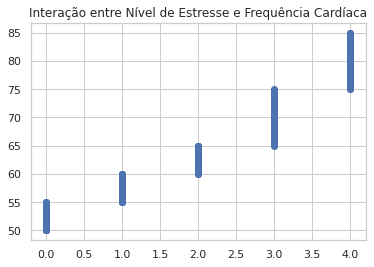

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Frequência Cardíaca'])
plt.title("Interação entre Nível de Estresse e Frequência Cardíaca")
plt.show()

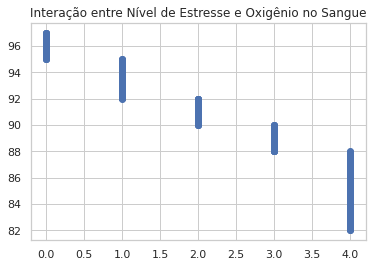

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['O2 no Sangue'])
plt.title("Interação entre Nível de Estresse e Oxigênio no Sangue")
plt.show()

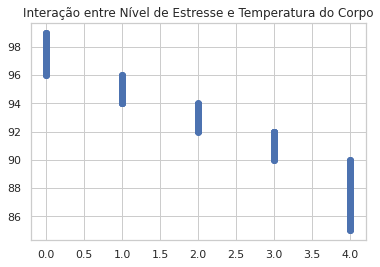

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Temperatura do Corpo'] )
plt.title("Interação entre Nível de Estresse e Temperatura do Corpo")
plt.show()

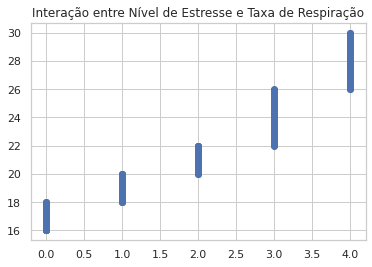

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Taxa de Respiração'] )
plt.title("Interação entre Nível de Estresse e Taxa de Respiração")
plt.show()

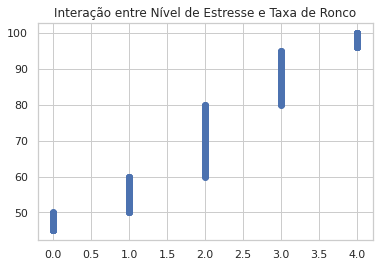

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Taxa de Ronco'])
plt.title("Interação entre Nível de Estresse e Taxa de Ronco")
plt.show()

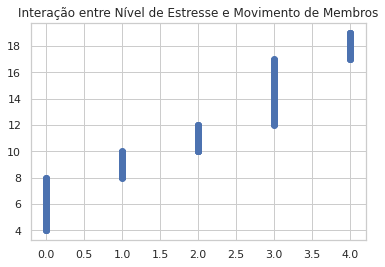

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Movimento de Membros'] )
plt.title("Interação entre Nível de Estresse e Movimento de Membros")
plt.show()

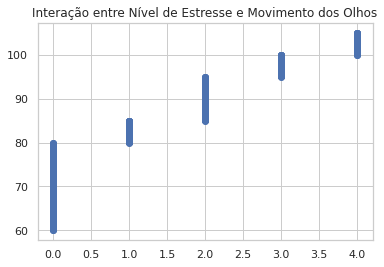

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Movimento dos Olhos'] )
plt.title("Interação entre Nível de Estresse e Movimento dos Olhos")
plt.show()

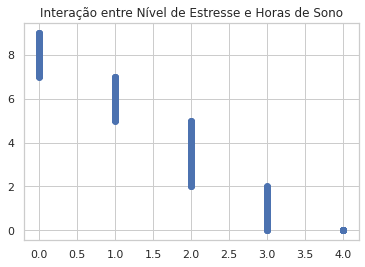

In [ ]:
plt.scatter(df_stress_ren['Nível de Estresse'], df_stress_ren['Horas de Sono'] )
plt.title("Interação entre Nível de Estresse e Horas de Sono")
plt.show()

A partir dos dados podemos verificar algns pontos:
   
*   Quando uma pessoa está dormindo, o coração bate de 5 a 10 vezes mais devagar que o normal.
*   Os níveis de oxigênio são considerados anormais levando ao estresse quando caem abaixo de 90%.
*   Um ligeiro aumento na temperatura resultou em um aumento dramático da boa qualidade do sono.
*   A frequência respiratória é considerada saudável se forem medidas 15-17 respirações por minuto (bpm).
*   As chances de experimentar estresse e outros problemas de saúde são altas 
quando a taxa de ronco é maior que 50dB.
*   Como o sono insuficiente não é saudável, um mínimo de 7 horas de sono é recomendado para adultos.



**Tabela de Correlação de Pearson**

O coeficiente de correlação de Pearson é um teste que mede a relação estatística entre duas variáveis contínuas. A relação entre essas duas variávies deve ser linear para que o coeficiente seja dado de modo adequado. O coeficiente de correlação de Pearson pode ter um intervalo de valores de +1 a -1. Um valor de 0 indica que não há associação entre as duas variáveis. Um valor maior que 0 indica uma associação positiva. Isto é, à medida que o valor de uma variável aumenta, o mesmo acontece com o valor da outra variável. Um valor menor que 0 indica uma associação negativa. Isto é, à medida que o valor de uma variável aumenta, o valor da outra diminui.

In [ ]:
df_stress_ren.corr()

,Taxa de Ronco,Taxa de Respiração,Temperatura do Corpo,Movimento de Membros,O2 no Sangue,Movimento dos Olhos,Horas de Sono,Frequência Cardíaca,Nível de Estresse
Taxa de Ronco,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
Taxa de Respiração,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Temperatura do Corpo,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
Movimento de Membros,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
O2 no Sangue,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
Movimento dos Olhos,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
Horas de Sono,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
Frequência Cardíaca,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
Nível de Estresse,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


**Histograma dos Dados Analisados**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d6e14590>,
      dtype=object)

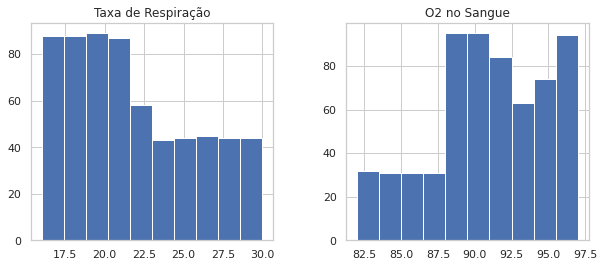

In [ ]:
features = ['Taxa de Respiração', 'O2 no Sangue']
df_stress_ren[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1d6d093d0>,
      dtype=object)

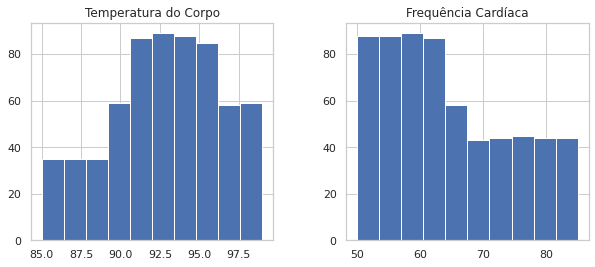

In [ ]:
features = ['Temperatura do Corpo', 'Frequência Cardíaca']
df_stress_ren[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1db14bf90>,
      dtype=object)

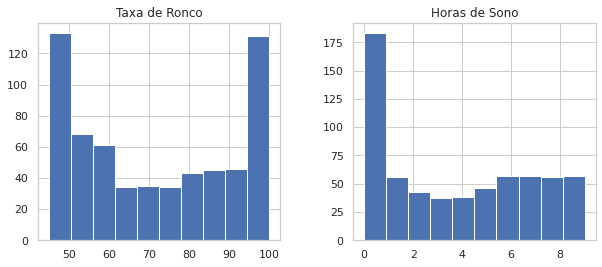

In [ ]:
features = ['Taxa de Ronco', 'Horas de Sono']
df_stress_ren[features].hist(figsize=(10, 4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1db30f310>,
      dtype=object)

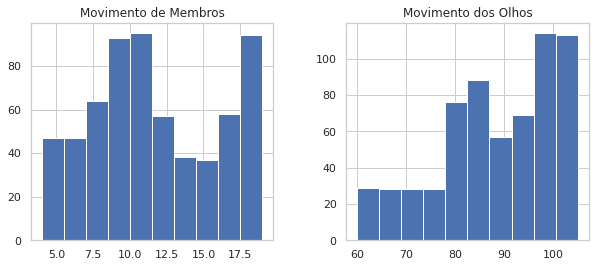

In [ ]:
features = ['Movimento de Membros', 'Movimento dos Olhos']
df_stress_ren[features].hist(figsize=(10, 4))

**Box Plot dos Dados Analisados**

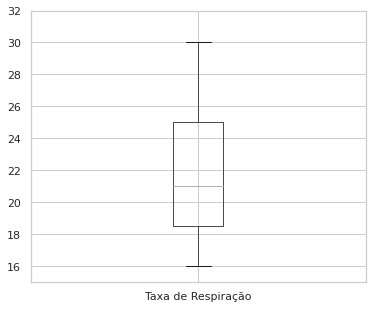

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Taxa de Respiração')
plt.ylim(15,32)
plt.show()

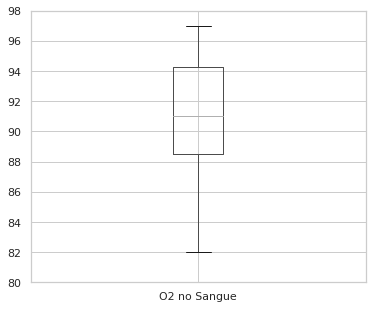

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='O2 no Sangue')
plt.ylim(80,98)
plt.show()

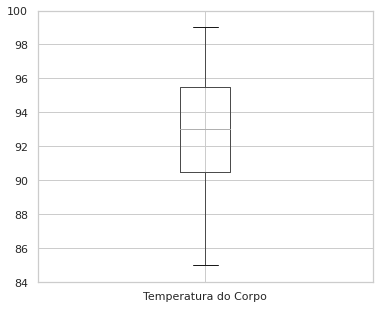

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Temperatura do Corpo')
plt.ylim(84,100)
plt.show()

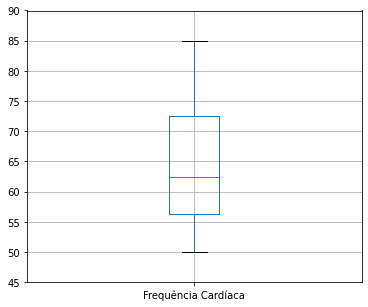

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Frequência Cardíaca')
plt.ylim(45,90)
plt.show()

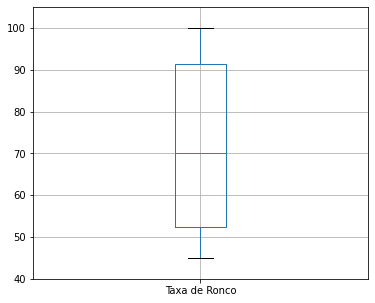

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Taxa de Ronco')
plt.ylim(40,105)
plt.show()

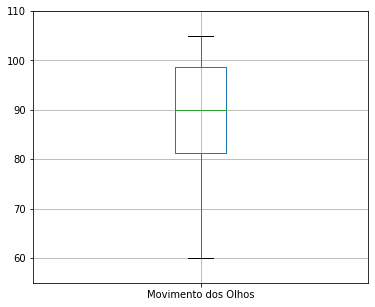

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Movimento dos Olhos')
plt.ylim(55,110)
plt.show()

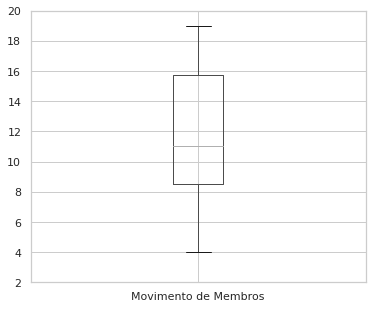

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Movimento de Membros')
plt.ylim(2,20)
plt.show()

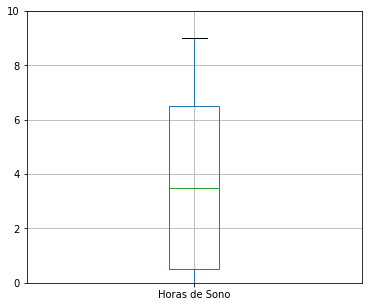

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Horas de Sono')
plt.ylim(0,10)
plt.show()

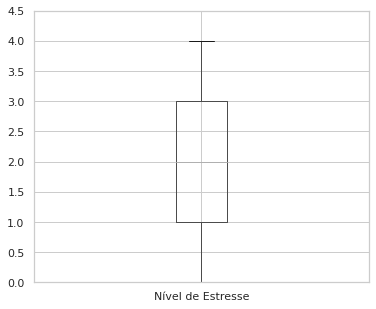

In [ ]:
plt.figure(figsize=(6,5))
df_stress_ren.boxplot(column='Nível de Estresse')
plt.ylim(0,4.5)
plt.show()

**MODELO USADO - REGRESSÃO LINEAR MÚLTIPLA**

A Regressão Linear Múltipla é um modelo de análise que usamos quando modelamos a relação linear entre uma variável de desfecho contínua e múltiplas variáveis preditoras que podem ser contínuas ou categóricas.

A principal diferença entre a Regressão Linear Múltipla e a Simples, é que na simples só usamos uma variável preditora. Você pode aprender mais sobre a regressão linear simples

**Separando Variáveis**

In [ ]:
# A regressão feita será visando a predição do nível de estresse
X = df_stress_ren.drop('Nível de Estresse', axis=1)
y = df_stress_ren['Nível de Estresse'].values

**Divisão dos Grupos**

In [ ]:
np.random.seed(100) #gerador de sementes aleatórias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=53) 

**Iniciando o Modelo de Regressão**

In [ ]:
reg_all = LinearRegression() # objeto criado

reg_all.fit(X_train, y_train) # ajustando os dados usados

y_pred = reg_all.predict(X_test) # predição do modelo usando os ajustes feitos

RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) # erro associado ao modelo escolhido

# Para verificarmos o quanto esse modelo é válido para o banco de dados escolhidos, fazemos:
print("Temos que o R^2 é: {} \nO RMSE para o modelo é: {}".format(reg_all.score(X_test, y_test), RMSE)) 


Temos que o R^2 é: 0.9998606954028346 
O RMSE para o modelo é: 0.016250494025650385


**Validação Cruzada**

In [ ]:
reg = LinearRegression() # objeto criado para a regressão linear

# Calculando os scores para k-fold para diferentes valores de cross validation: 

cv_scores1 = cross_val_score(reg, X, y, cv=3)

cv_scores2 = cross_val_score(reg, X, y, cv=5)

cv_scores3 = cross_val_score(reg, X, y, cv=7)

cv_scores4 = cross_val_score(reg, X, y, cv=11)

cv_scores5 = cross_val_score(reg, X, y, cv=13)

# Valores encontrados:
print(" Para cv = 3, temos: {} \n Para cv = 5: {} \n Para cv = 7: {} \n Para cv = 11: {} \n Para cv = 13: {}".format(np.mean(cv_scores1),
                                                                                                                    np.mean(cv_scores2),
                                                                                                                    np.mean(cv_scores3),
                                                                                                                    np.mean(cv_scores4),
                                                                                                                    np.mean(cv_scores5)))

 Para cv = 3, temos: 0.9998860386790663 
 Para cv = 5: 0.9998877345837487 
 Para cv = 7: 0.9998879035112441 
 Para cv = 11: 0.9998860344399388 
 Para cv = 13: 0.9998868427203542


Nota-se, com base nos resultados obtidos pelo Método de Regressão Linear Múltipla, que o Modelo de Machine Learning escolhido é adequado para o conjunto de dados em questão. Visto que temos um R^2 de 0.99986 e ainda temos um RMSE de 0.01625.